###  YOLO v2

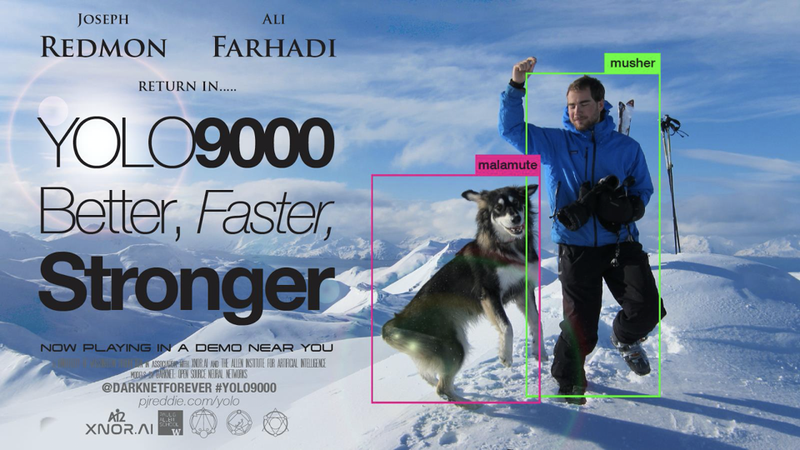


#### Make it better(정확도 향상)

- Batch Normalization

   - 2% 향상 in mAP
   
<br>

- High resolution classifier

   - General : 256x256
   
   - Orignal Yolo: 224x224 -> detector 448x448

   - YOLOv2: fine the classification network(448x448)
   
   - 10 epochs on ImageNet-> detector
   
   - 4%향상 in mAP
 
 
<br>

- Convolutional Anchor boxes

   - Faster R-CNN: bbox예측
   
   - Original YOLO: FC를 사용하는 동안 bbox예측
   
   - YOLOv2
   
      - FC제거, anchor boxes사용
      
      - Shrink network: 416 input image
    
      - Conv layers: down sample (416x416->13x13)
      
      
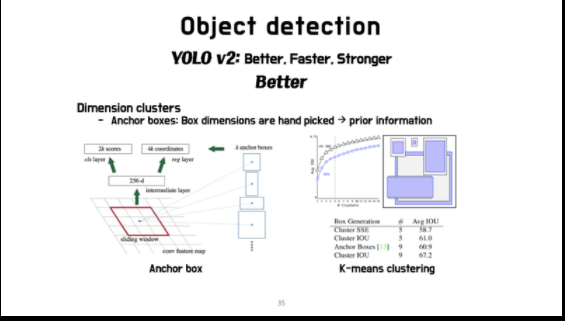


#### Do it faster(detection 속도 향상)

- Darknet-19

   - VGG16의존
   
   - YOLO: Googlenet
   
   - YOLOv2
   
      - 3x3 filters(VGG와 유사)
      
      - NIN(1x1 filters, 3x3 convolutions[병목현상])
      
      - Darknet-19: 19 conv + 5 maxpooling

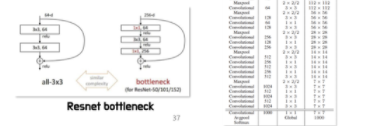


#### Makes us stronger(넓은 범위의 class예측)

9000개의 클래스를 분류하면서 검출까지 한다.

참고:https://dhhwang89.tistory.com/136


#### YOLO v2의 성능 비교

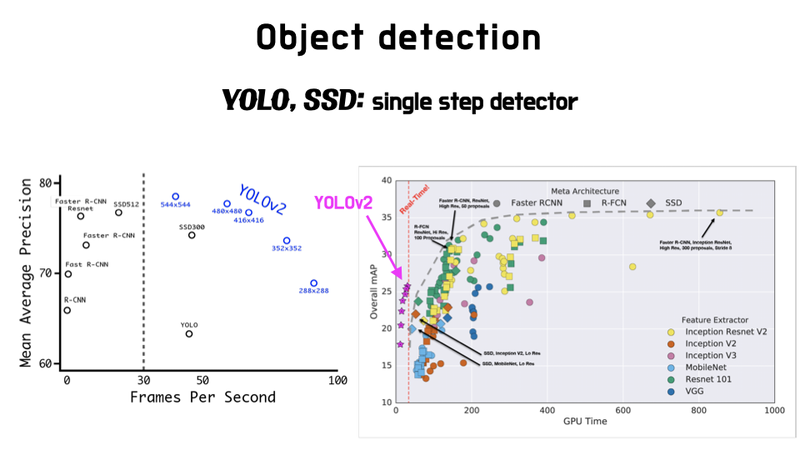


### SSD(Single Show MultiBox Detector)

SSD는 YOLO v1에서 grid사용 후 생기는 단점 해결법 제시한다.

#### Image Pyramid

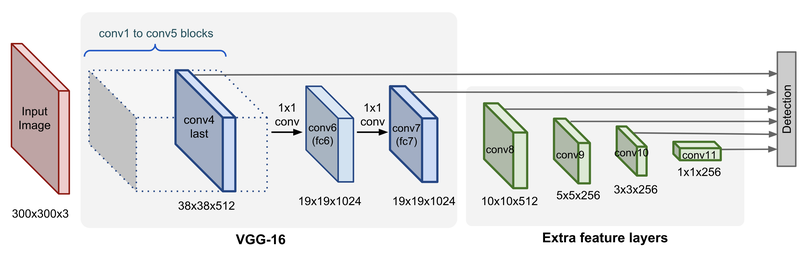


- Image Pyramid

   - VGG16 by pre-trained ImageNet
   
   - Pooling layer by VGG, 하나의 image feature로 사용 가능
   
<br>

단점: feature map의 개수만큼 계산량이 많기에 너무 큰 특성맵의 경우 network가 충분히 깊지 않아 계산하기 힘들 수 있다.

<br>

#### Workflow of SSD

- 배경

box정보(x,y,w,h)정보 예측하기 위한 정보가 없으므로 넓은 bbox분포를 다 학습할 수 없다. 즉, 성능 손실이 일어나게 되므로, anchor를 적용해야한다.

- Default box

bounding box(x,y,w,h)특성이 존재하므로 pre-defined된box를 적용하는 layer를 추가하면 성능 향상에 도움이 되는 것이다.

<br>

#### Frame work of SSD


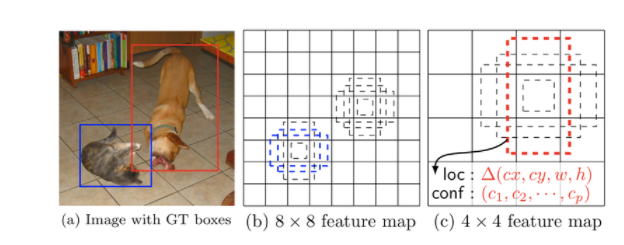

- a: 이미지 파일로 Ground Truth데이터셋

- b: VGG Backbone에 가까운 fine-grained feature map(세밀하게 특징 분류하는 것으로, 비슷한 특징을 가진 class 분류)

- receptive field가 넓은 4x4 feature map

<br>

#### Scale for Default box

*식

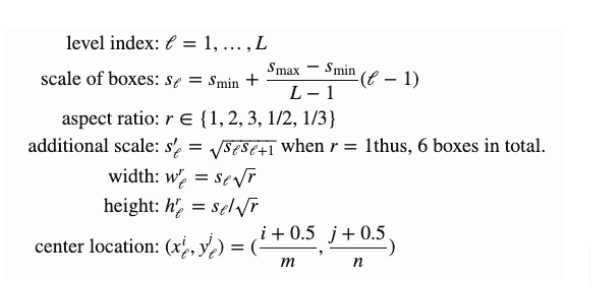

*직관적 그림

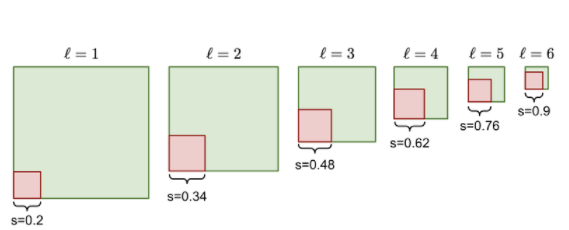


즉, 학습할 이미지의 따라 aspect ration을 조정해야하지만 임의로 정하는 것은 비효율적이므로 KNN알고리즘 활용하면 된다.

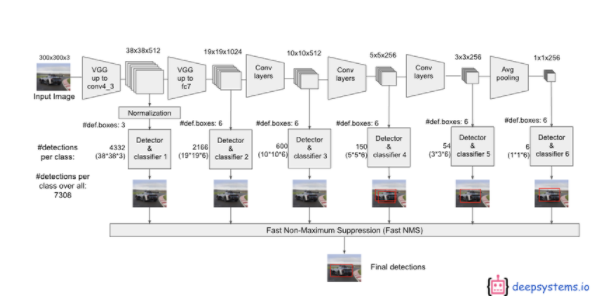

<br>

#### SSD Loss functions

- Objective Loss function: Localization loss and Confidence loss의 가중합(weighted sum)

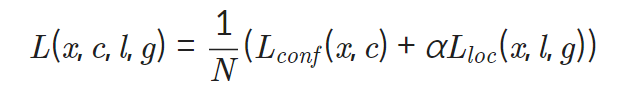



<br>

- Localization Loss function: 예측된 박스 l과 Ground truth box g파라미터 사이의 Smooth L1 Loss

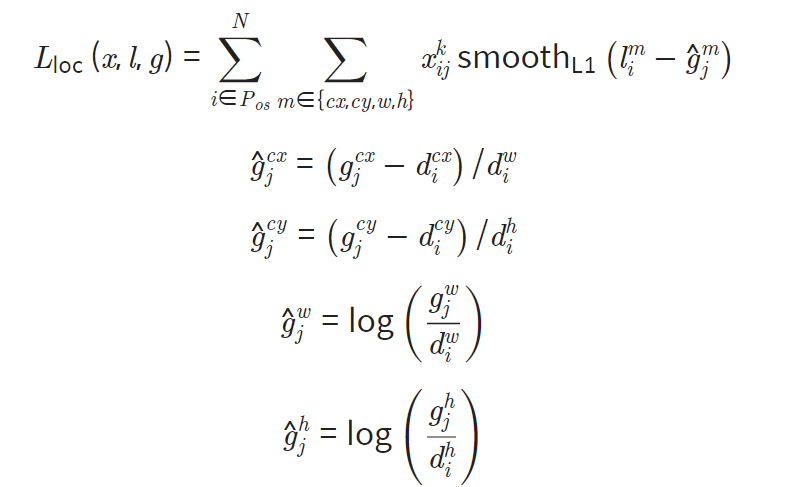

<br>

- Confidence Loss Function: 여러 loss의 confidence c의 softmax loss

> 매칭된 class에 softmax를 취하고 그렇지 않은 class은 1(배경) 과 0(배경아님)으로 나뉩니다.. 즉, 최종 predicted class score는 예측할 class+배경 class 지표

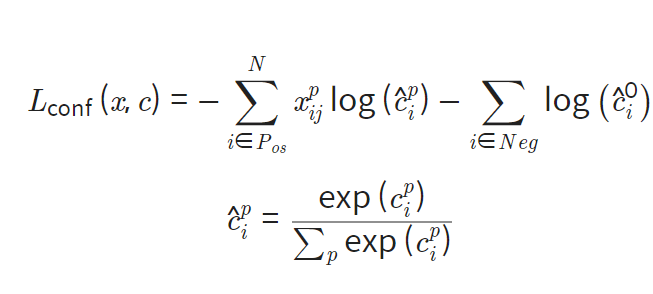

<br>

- 용어 정리

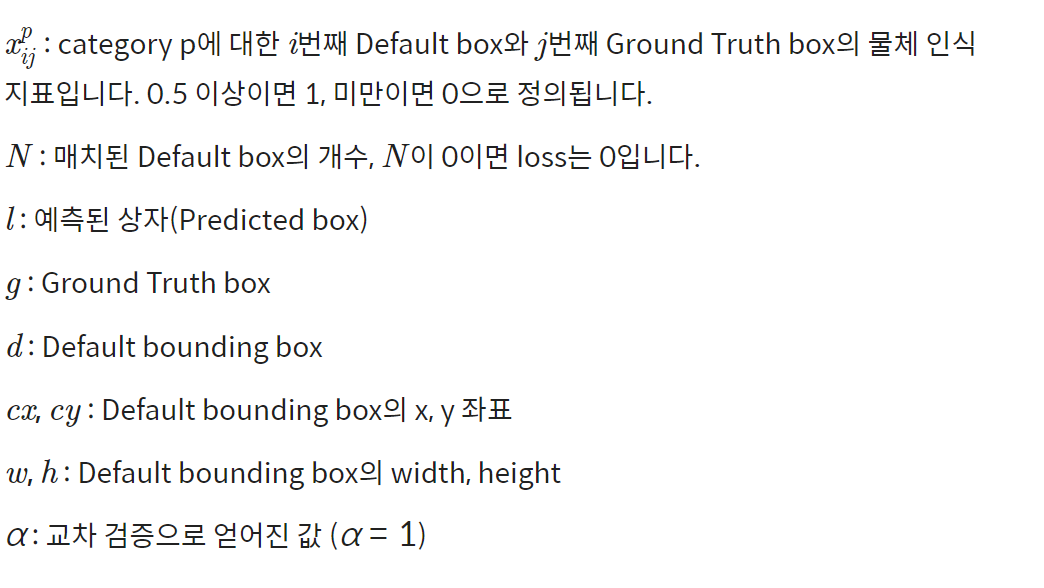


<br>

#### Hard negative mining

대부분의 Default box가 배경이기 때문에 마지막 class의 loss 부분에서는 positive:negative 비율을 1:3으로 정해 출력합니다. 즉 high confidence 순으로 정렬해 상위만 가져다 씁니다.


#### SSD성능

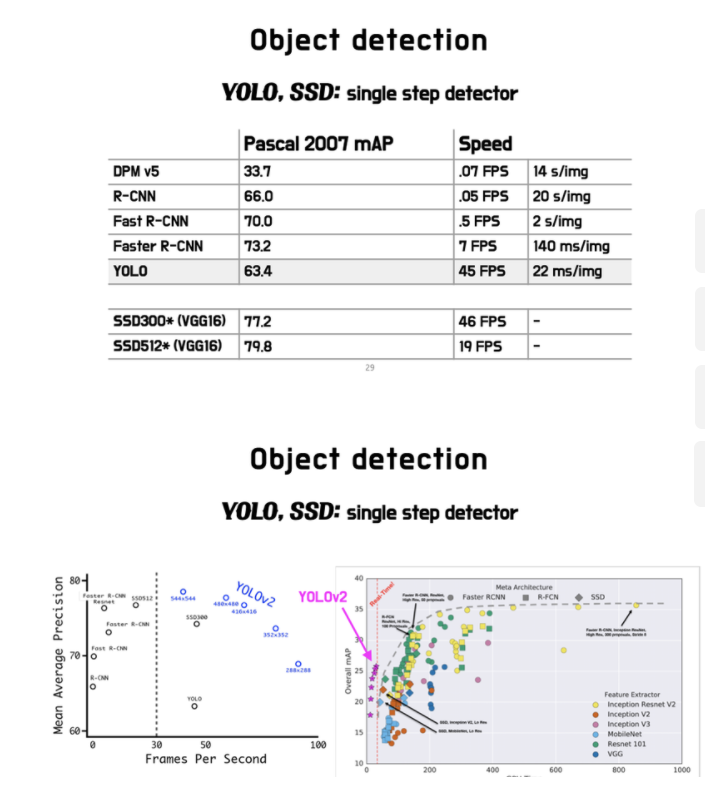